In [1]:
# Importing and Crating the download url for the data.
import urllib
import os
DOWNLOAD_URL = "https://www.openml.org/data/get_csv/52667/mnist_784.arff"

In [2]:
# Creating function for loading data in pandas

import pandas as pd

def load_data():
    return pd.read_csv(DOWNLOAD_URL)

**Retrieve and load the mnist_784 dataset of 70,000 instances.**

In [3]:
# Creating variable which holds the data in Panda frame.
mnist_data = load_data()

In [4]:
# Checking if the data has been loaded or not.
mnist_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [5]:
# Checking if there is any missing value and their data types.
mnist_data['class'].describe()

count    70000.000000
mean         4.452429
std          2.890195
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: class, dtype: float64

**Display each digit.**

In [6]:
# Creating function to view each digit from 0 to 9 in data frame.
def show_each_digits():    
    for i in range(10):
        print("Digit Number: ", i)
        print(mnist_data.loc[mnist_data['class']==i].head(1))
        print()

show_each_digits()

Digit Number:  0
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
1       0       0       0       0  ...         0         0         0      0

[1 rows x 785 columns]

Digit Number:  1
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
3       0       0       0       0  ...         0         0         0      1

[1 rows x 785 columns]

Digit Number:  2
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
5       0       0       0       0  ...         0         0         0      2

[1 rows x 785 columns]

Digit Number:  3
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
7       0       0       0       0  ...         0         0         0      3

[1 rows x 785 columns]

Digit Number:  4
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
2       0       0       0       0  ...         0         0         0      4

[1 rows x 785 columns]

Digit Number:  5
   pixel1  pi

In [7]:
# Seprating the label and class in different variable.

mnist_data_x,mnist_data_y = mnist_data.iloc[:, :-1], mnist_data.iloc[:, [-1]]

**Use PCA to retrieve the 1th and 2ndprincipal component and output their explained variance ratio.**

In [8]:
# Using PCA to reduce the data to two dimension using n_components=2

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
mnist_x2d = pca.fit_transform(mnist_data_x)

In [9]:
# Viewing each variance ration and how much perentage of that pca varaince cover the relavance of data. 

print("First explained variance ratio: ",pca.explained_variance_ratio_[0])
print("Second explained variance ratio: ",pca.explained_variance_ratio_[1])

First explained variance ratio:  0.09746115922288832
Second explained variance ratio:  0.07155444582212812


**Plot the projections of the 1th and 2nd principal component onto a 1D hyperplane.**

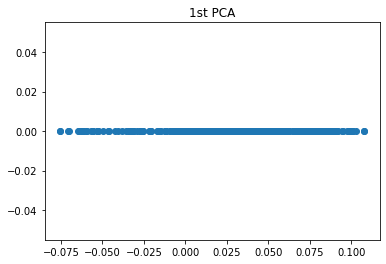

In [10]:
# Showing the 1st pca components in 1 dimension.

import matplotlib.pyplot as pl
import numpy as np

pl.scatter(pca.components_.T[:,0],np.zeros_like(pca.components_.T[:,0]))
pl.title("1st PCA")
pl.show()

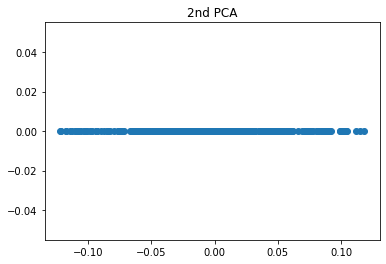

In [11]:
# Showing the 2nd PCA component in 1 dimension.

pl.scatter(pca.components_.T[:,1],np.zeros_like(pca.components_.T[:,1]))
pl.title("2nd PCA")
pl.show()

**Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.**

In [12]:
# Reucing the dimensionality using the IncementalPCA which use the batch size for performance improvement and reducing the memmory footprint. 
from sklearn.decomposition import IncrementalPCA

n_batch = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(mnist_data_x, n_batch):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(mnist_data_x)

**Display the original and compressed digits from**

In [13]:
# First Data Frame before the reduction in dimmention of the Data from 784 to 154.
print("Before Reduction in Dimention: ")
mnist_data_x.head()

Before Reduction in Dimention: 


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# First Data Frame after the reduction in dimmention of the Data from 784 to 154.
print("After Reduction in Dimention: ")
pd.DataFrame(X_reduced).head()

After Reduction in Dimention: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,122.255007,316.233645,51.131782,556.897593,-49.209378,-217.068754,233.712684,188.824287,-358.799779,203.544286,-210.045005,-244.283640,57.231330,-763.777135,-185.070337,6.653937,-353.109564,294.316769,-274.396835,149.630700,-19.663417,-76.354621,201.532436,-260.724938,-34.775984,89.942347,290.128531,182.014938,-138.849105,-121.299506,97.909828,40.807411,-121.467097,99.191838,-144.303905,-193.272967,53.081332,-207.031625,-157.880921,-385.662868,...,-1.174585,70.355909,-20.866220,56.062135,-80.010876,-33.866131,65.505312,33.406408,77.660023,61.150370,14.855533,-18.851063,-31.146451,63.191639,-73.255857,-22.835960,-183.441822,-28.508034,-5.828400,15.364154,-22.568541,50.553282,-77.118025,1.550939,0.100011,-103.869165,-30.278495,-11.415907,26.325972,21.624739,73.805908,-16.414691,32.917062,-23.401677,-11.305323,-45.639076,-10.121299,79.549787,70.817891,9.171330
1,1010.494459,289.964470,-576.120818,485.084205,-841.478633,-145.467420,-48.332524,-102.230718,34.785537,151.268239,282.698469,-110.105766,329.930062,-97.005855,226.477912,156.061978,49.420735,37.918965,-63.201511,-113.473028,-202.555109,-94.202506,-12.696558,-29.639309,-233.868980,196.930539,-18.924116,28.397862,-363.640941,-84.502110,-7.000394,-100.610777,-192.732102,87.006695,-137.236390,-79.539047,-61.116582,-4.128965,-43.757992,83.771688,...,28.022560,75.325632,83.665314,18.461816,-14.068387,3.428046,-23.598059,-1.464903,-55.580659,32.021538,-50.506723,-6.143923,1.767186,-18.107004,27.577276,-42.937586,37.450356,37.036003,30.066627,0.976680,67.079509,49.877086,-10.251077,54.440365,-6.340684,-8.665573,-7.342778,-55.837051,29.517265,-20.337457,5.740897,87.701681,1.006155,-4.644288,48.814448,46.999776,28.936237,24.447860,-50.076869,39.407491
2,-58.995999,-393.698047,161.997245,-529.220864,-313.159458,8.969471,-860.992353,374.290772,-78.502189,-192.723700,-455.197334,-146.517697,-189.107082,-87.139883,163.231649,201.711398,-169.363863,-120.027410,20.957637,-430.562591,75.703544,5.060032,-106.720088,20.457015,135.257336,87.258228,-193.902997,123.490345,-4.657137,-276.015550,5.712435,106.949328,58.079511,-86.803601,43.934728,-184.554266,158.612050,176.827378,-128.716838,-12.811606,...,253.541791,76.750888,31.307498,46.911991,-56.806918,-11.085844,-45.236354,97.521703,97.964194,44.911568,57.763118,1.911109,30.496106,-22.198368,-1.989152,-106.124827,-26.516765,-99.949440,-84.937912,-150.610409,28.562015,-116.396911,-5.448939,17.771371,2.500340,-72.925240,74.696592,-47.593587,145.486660,-22.562333,47.918900,5.516353,-101.754567,-44.185629,-40.866251,58.531564,65.020376,56.436546,-87.922680,-17.832396
3,-796.965195,607.421156,-295.522597,-109.112483,25.665906,697.860914,-474.507036,-99.776449,298.604314,4.532157,424.731118,-180.323796,-239.347738,-158.853089,172.791717,-48.417944,-16.951849,191.365100,-146.120005,129.977401,62.035318,-117.003768,-65.217407,93.932837,-116.585207,16.982421,268.285959,174.586207,-1.170905,-109.475634,-5.223889,-72.121527,86.953550,-126.291842,122.046610,-79.933591,-5.536227,9.942634,41.374221,57.068649,...,0.502070,-25.690829,-66.275855,-31.599316,27.266963,-33.644870,-0.060234,59.107989,28.145878,16.398242,8.787361,-23.100101,3.609637,-3.750779,-13.650994,11.015186,-26.231472,-45.939979,17.582248,27.081024,-15.928312,-5.800218,12.456131,13.938062,19.862363,48.852147,-39.171776,-9.486088,48.281501,-4.704668,58.669210,-0.711161,18.674953,-48.264480,-11.143099,20.127117,4.424049,36.464501,-11.329792,-9.154312
4,-391.318636,-729.803919,-13.906725,242.894328,98.772859,35.925972,-87.458847,-415.777784,200.296995,106.210314,355.229994,443.297946,275.829987,309.827666,-81.380066,269.537765,-9.366595,-175.808890,-73.364202,-256.092584,21.721985,-59.262016,-231.132529,2.976452,22.25510

### Question 2

**1. Generate Swiss roll dataset.**

In [15]:
# We will be using the Sklearn make_swiss_roll function to create the swiss roll. I have also added the noise in the data as well.

from sklearn.datasets import make_swiss_roll

swiss_X, swiss_y = make_swiss_roll(n_samples=1000, noise=0.15, random_state=75)

# Seprating the y using the 6.9 value threshold to 1 and 0. 
y = swiss_y > 6.9

**2. Plot the resulting generated Swiss roll dataset.**

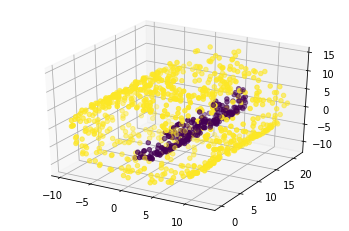

In [16]:
# Ploting the data on to 3d scatter plot in matplot lib.

fig = pl.figure()
ax = pl.axes(projection='3d')

ax.scatter3D(swiss_X[:,0], swiss_X[:,1], swiss_X[:,2],c=y);

**3. Use Kernel PCA (kPCA) with linear kernel , a RBF kernel , and a sigmoid kernel**

In [17]:
# Fiting the data using the KernelPCA using the different kernel such as linear, rbf and sigmoid.

from sklearn.decomposition import KernelPCA

linear_kernal = KernelPCA(n_components=2,kernel="linear")
swiss_linear_X_transformed = linear_kernal.fit_transform(swiss_X)

rbf_kernel = KernelPCA(n_components=2,kernel="rbf")
swiss_rbf_X_transformed = rbf_kernel.fit_transform(swiss_X)

sigmoid_kernal = KernelPCA(n_components=2,kernel="sigmoid")
swiss_sigmoid_X_transformed = sigmoid_kernal.fit_transform(swiss_X)

**4. Plot the kPCA results of applying the linear kernel , a RBF kernel , and a sigmoid kernel from (3). Explain and compare the results**

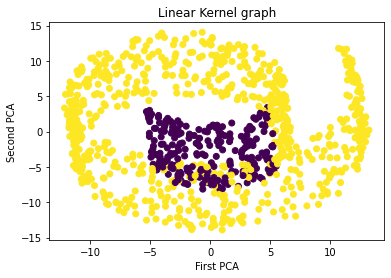

In [18]:
# Ploting the linear kernel result.

pl.title("Linear Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_linear_X_transformed[:,0],swiss_linear_X_transformed[:,1],c=y)
pl.show()

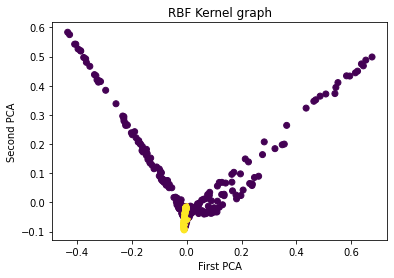

In [19]:
# Ploting the rbf kernel result.

pl.title("RBF Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_rbf_X_transformed[:,0],swiss_rbf_X_transformed[:,1],c=y)
pl.show()

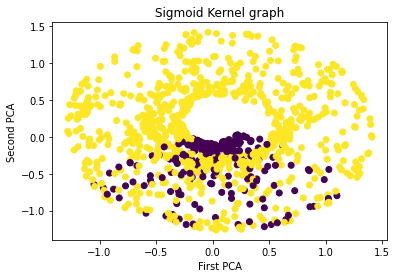

In [20]:
# Ploting the sigmoid kernel result.

pl.title("Sigmoid Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_sigmoid_X_transformed[:,0],swiss_sigmoid_X_transformed[:,1],c=y)
pl.show()

**5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.**

In [21]:
# Creating the gride search and ploting the different parameter to find the best suitable parameter for the kernel.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kPCA", KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
])

param_grid = [{
    "kPCA__gamma":np.linspace(0.03,0.05,10),
    "kPCA__kernel": ['rbf','sigmoid']
}]

grid_search = GridSearchCV(clf,param_grid, cv=3)
grid_search.fit(swiss_X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kPCA',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [22]:
# Printing the best paramiter using the best_params of the gridesearch CV.

print(grid_search.best_params_)

{'kPCA__gamma': 0.04111111111111111, 'kPCA__kernel': 'rbf'}


**6. Plot the results from using GridSearchCV in (2).**

In [25]:
# We will be using the gride search best estimetter which will return the object of
# the KernelPCA with the best parameter in it. We can directly fit and transform the data.

swiss_x_red = grid_search.best_estimator_[0].fit_transform(swiss_X)

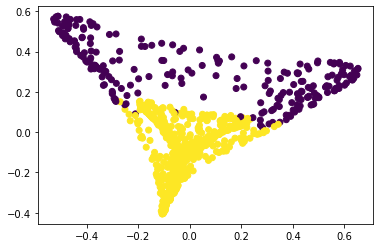

In [26]:
# Now we can plot the result of 2d data.
pl.scatter(swiss_x_red[:,0],swiss_x_red[:,1],c=y)
pl.show()